In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Store filepath in a variable.
state_file = "../Datasets/State_Zhvi_AllHomes.csv"
county_file = "../Datasets/County_Zhvi_AllHomes.csv"
zip_code_file = "../Datasets/Zip_Zhvi_AllHomes.csv"

In [3]:
# Read our Data file with the pandas library, and create dataframes.
# The Zillow CSV files require ISO-8859-1 encoding.
state_data = pd.read_csv(state_file, encoding="ISO-8859-1")        # Zillow Home Value Index (ZHVI)
county_data = pd.read_csv(county_file, encoding="ISO-8859-1")      # Zillow Home Value Index (ZHVI)
zip_code_data = pd.read_csv(zip_code_file, encoding="ISO-8859-1")  # Zillow Home Value Index (ZHVI)

In [4]:
# Cleaning up zip code data
# Place the rows with San Diego County into a dataframe
zip_sd_county_row = zip_code_data.loc[zip_code_data["CountyName"] == "San Diego County", :]
del zip_sd_county_row['RegionID']
del zip_sd_county_row['State']
del zip_sd_county_row['Metro']
del zip_sd_county_row['CountyName']
zip_sd_county_row

# Set the index to be region name
sd_county_zips_index = zip_sd_county_row.set_index("RegionName")
sd_county_zips_index.head()

,City,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
RegionName,,,,,,,,,,,,,,,,,,,,,
91910,Chula Vista,119,163800.0,163500.0,163100.0,162700.0,162400.0,162300.0,162300.0,162500.0,...,525900,526500,526500,527500,531100,534200,535800,536500,536400,535700
92126,San Diego,183,153700.0,153200.0,152700.0,152100.0,151500.0,151000.0,150600.0,150300.0,...,588300,588100,589800,594200,598700,600600,602700,605800,607500,607100
91911,Chula Vista,197,143800.0,143500.0,143100.0,142700.0,142500.0,142300.0,142300.0,142400.0,...,474500,474200,474700,476600,479200,481100,483000,484900,486000,486200
92101,San Diego,230,147800.0,147800.0,147900.0,148100.0,148400.0,148800.0,149400.0,150000.0,...,594400,594500,594500,594200,594300,594700,595700,596400,595500,593800
92109,San Diego,231,209400.0,208400.0,207300.0,206200.0,205100.0,204000.0,203200.0,202700.0,...,943200,952100,958100,965000,974300,977400,974300,969400,964800,960300


In [5]:
# Find column index for desired date range start and end
start = sd_county_zips_index.columns.get_loc("2009-06")
end = sd_county_zips_index.columns.get_loc("2018-12")

# Make a new dataframe containing the 10 year range of data Dec 2008 - Dec 2018
# range_dates = sd_county_zips_index.iloc[:, start:end+1]
sd_county_zips_rec_city_rank = pd.DataFrame(sd_county_zips_index, columns=["City", "SizeRank"])

sd_county_zips_rec_date_range = sd_county_zips_index.iloc[:, start:end+1]

sd_county_zips_rec = pd.merge(sd_county_zips_rec_city_rank, sd_county_zips_rec_date_range, on="RegionName")
sd_county_zips_rec.index.names = ['Zip Code']
sd_county_zips_rec.head()

,City,SizeRank,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
Zip Code,,,,,,,,,,,,,,,,,,,,,
91910,Chula Vista,119,308500.0,304500.0,302600.0,302100.0,302700.0,303900.0,305400.0,308000.0,...,524100,525900,526500,526500,527500,531100,534200,535800,536500,536400
92126,San Diego,183,353500.0,353800.0,356300.0,359300.0,362600.0,365800.0,368000.0,369700.0,...,587400,588300,588100,589800,594200,598700,600600,602700,605800,607500
91911,Chula Vista,197,272100.0,268400.0,267100.0,267200.0,268400.0,269900.0,271400.0,272800.0,...,474300,474500,474200,474700,476600,479200,481100,483000,484900,486000
92101,San Diego,230,425300.0,421600.0,418600.0,416700.0,415600.0,415200.0,415900.0,415300.0,...,594000,594400,594500,594500,594200,594300,594700,595700,596400,595500
92109,San Diego,231,605200.0,608300.0,613200.0,617900.0,622600.0,626300.0,629300.0,631300.0,...,935800,943200,952100,958100,965000,974300,977400,974300,969400,964800


In [6]:
# Make a dataframe for summary
summary_zips_base = pd.DataFrame(sd_county_zips_rec, columns=["2009-06", "2018-12"])
summary_zips = summary_zips_base.rename(columns={"2009-06": "2009-Q2 Home Value", "2018-12": "2018-Q4 Home Value"})
summary_zips.index.names = ['Zip Code']
summary_zips["Home Value Change"] = (summary_zips["2018-Q4 Home Value"] - summary_zips["2009-Q2 Home Value"])*100 / summary_zips["2009-Q2 Home Value"]

# Make a copy of the summary dataframe that is formatted for display
summary_zips_formatted = summary_zips.copy()
summary_zips_formatted["2009-Q2 Home Value"] = summary_zips_formatted["2009-Q2 Home Value"].map("${:,.0f}".format)
summary_zips_formatted["2018-Q4 Home Value"] = summary_zips_formatted["2018-Q4 Home Value"].map("${:,.0f}".format)
summary_zips_formatted["Home Value Change"] = summary_zips_formatted["Home Value Change"].map("{:.2f}%".format)
summary_zips_formatted.head()

,2009-Q2 Home Value,2018-Q4 Home Value,Home Value Change
Zip Code,,,
91910,"$308,500","$536,400",73.87%
92126,"$353,500","$607,500",71.85%
91911,"$272,100","$486,000",78.61%
92101,"$425,300","$595,500",40.02%
92109,"$605,200","$964,800",59.42%


In [7]:
# Rank the 10 year zip code data by value change (%) descending
ranked_zips = summary_zips.sort_values(["Home Value Change"], ascending=False)
ranked_zips.head()

# Make a copy of the sorted dataframe that is formatted for display
ranked_zips_formatted = ranked_zips.copy()
ranked_zips_formatted["2009-Q2 Home Value"] = ranked_zips_formatted["2009-Q2 Home Value"].map("${:,.0f}".format)
ranked_zips_formatted["2018-Q4 Home Value"] = ranked_zips_formatted["2018-Q4 Home Value"].map("${:,.0f}".format)
ranked_zips_formatted["Home Value Change"] = ranked_zips_formatted["Home Value Change"].map("{:.2f}%".format)
ranked_zips_formatted

,2009-Q2 Home Value,2018-Q4 Home Value,Home Value Change
Zip Code,,,
92113,"$173,200","$406,300",134.58%
91932,"$293,400","$605,500",106.37%
91950,"$212,900","$428,900",101.46%
92102,"$231,600","$462,400",99.65%
92105,"$220,000","$434,800",97.64%
92114,"$231,200","$453,900",96.32%
92007,"$694,400","$1,300,400",87.27%
92027,"$252,400","$472,200",87.08%
92154,"$258,500","$479,000",85.30%


In [8]:
# Take the top 10 highest appreciation rates and put them in a dataframe
top_10_df = ranked_zips.iloc[0:10, :]

# Merge top_10_df with sd_county_zips_10yr to get 10yr monthly data for the top 10
top_10_all_months = pd.merge(top_10_df, sd_county_zips_rec, how='left', on = ['Zip Code'])
del top_10_all_months['2009-Q2 Home Value']
del top_10_all_months['2018-Q4 Home Value']
del top_10_all_months['Home Value Change']
del top_10_all_months['City']
del top_10_all_months['SizeRank']
top_10_all_months

,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
Zip Code,,,,,,,,,,,,,,,,,,,,,
92113,173200.0,166300.0,162200.0,159800.0,158700.0,158700.0,159400.0,160200.0,160400.0,161600.0,...,393800,395300,396700,398100,400400,403200,404400,405000,406000,406300
91932,293400.0,288000.0,283900.0,280300.0,277300.0,275100.0,273500.0,272700.0,272600.0,274500.0,...,590500,594300,595300,595000,595600,598800,601800,604200,605800,605500
91950,212900.0,208700.0,206800.0,206400.0,207200.0,208500.0,209400.0,209600.0,209900.0,211700.0,...,418400,419300,418900,418300,418400,419300,421400,425000,427900,428900
92102,231600.0,226100.0,222400.0,219600.0,217900.0,216900.0,217000.0,215700.0,214700.0,215300.0,...,437300,438300,438600,438700,440800,445300,450500,455500,460100,462400
92105,220000.0,216000.0,213800.0,212300.0,211500.0,211300.0,211600.0,212300.0,212300.0,213200.0,...,417100,416200,415200,414300,414800,417900,422800,428100,432300,434800
92114,231200.0,227800.0,226900.0,227100.0,228200.0,229900.0,231800.0,233700.0,234600.0,236500.0,...,445800,445900,444400,443900,444800,447000,449300,451400,453000,453900
92007,694400.0,697700.0,705000.0,712600.0,720200.0,727000.0,731900.0,738900.0,742700.0,741000.0,...,1281700,1285800,1280300,1275200,1280000,1291100,1296400,1296300,1296900,1300400
92027,252400.0,248600.0,246700.0,245700.0,245500.0,246100.0,247300.0,248600.0,248700.0,252200.0,...,465900,466700,466300,465700,465700,467100,468300,469700,471300,472200
92154,258500.0,254400.0,252600.0,251600.0,251200.0,251400.0,252200.0,253100.0,253200.0,254400.0,...,460400,462300,463300,464600,467300,470900,473100,475000,477400,479000


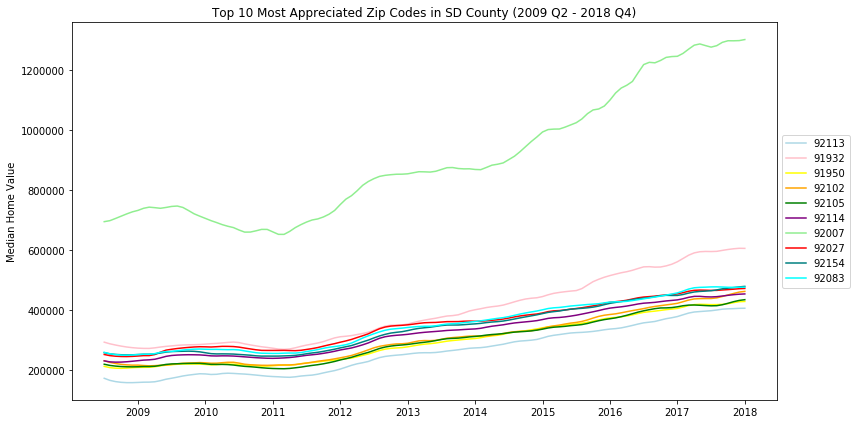

In [9]:
# De-index top_10_all_months
top_10_all_months_noIndex = top_10_all_months.copy()
top_10_all_months_noIndex.reset_index(inplace=True)

# Collect the months where data was collected
months = top_10_all_months.keys()

# Set figure size
plt.figure(figsize=(12,6))

# Plot top 10 monthly data as layered line graph
top_1_list = top_10_all_months.iloc[0,:]
top_1_zip = plt.plot(months, top_1_list, color="lightblue",label=top_10_all_months_noIndex.iloc[0,0])

top_2_list = top_10_all_months.iloc[1,:]
top_2_zip = plt.plot(months, top_2_list, color="pink",label=top_10_all_months_noIndex.iloc[1,0])

top_3_list = top_10_all_months.iloc[2,:]
top_3_zip = plt.plot(months, top_3_list, color="yellow",label=top_10_all_months_noIndex.iloc[2,0])

top_4_list = top_10_all_months.iloc[3,:]
top_4_zip = plt.plot(months, top_4_list, color="orange",label=top_10_all_months_noIndex.iloc[3,0])

top_5_list = top_10_all_months.iloc[4,:]
top_5_zip = plt.plot(months, top_5_list, color="green",label=top_10_all_months_noIndex.iloc[4,0])

top_6_list = top_10_all_months.iloc[5,:]
top_6_zip = plt.plot(months, top_6_list, color="purple",label=top_10_all_months_noIndex.iloc[5,0])

top_7_list = top_10_all_months.iloc[6,:]
top_7_zip = plt.plot(months, top_7_list, color="lightgreen",label=top_10_all_months_noIndex.iloc[6,0])

top_8_list = top_10_all_months.iloc[7,:]
top_8_zip = plt.plot(months, top_8_list, color="red",label=top_10_all_months_noIndex.iloc[7,0])

top_9_list = top_10_all_months.iloc[8,:]
top_9_zip = plt.plot(months, top_9_list, color="teal",label=top_10_all_months_noIndex.iloc[8,0])

top_10_list = top_10_all_months.iloc[9,:]
top_10_zip = plt.plot(months, top_10_list, color="aqua",label=top_10_all_months_noIndex.iloc[9,0])

# Create a title and axis labels
plt.title("Top 10 Most Appreciated Zip Codes in SD County (2009 Q2 - 2018 Q4)")
plt.ylabel("Median Home Value")

# Create desired ticks (year)
tick_locations = ["2009-12", "2010-12", "2011-12", "2012-12", "2013-12", "2014-12", "2015-12", "2016-12", "2017-12", "2018-12"]
tick_names = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
plt.xticks(tick_locations, tick_names)

# Create a legend for our chart
plt.legend(loc='center left', bbox_to_anchor=(1, .5))

# Tight Layout
plt.tight_layout()

# Output figure
plt.savefig('../Visualizations/Top 10 Appreciated Zip Codes in SD County (2009 Q2 - 2018 Q4).png')

# Show figure
plt.show()

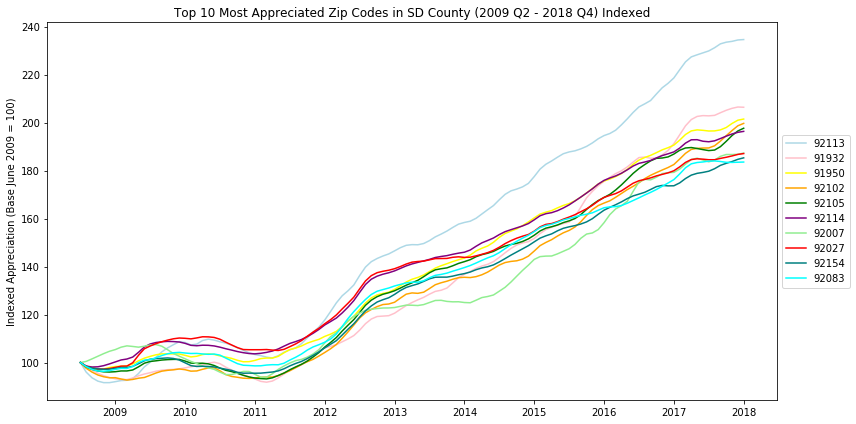

In [26]:
# Make indexed chart showing appreciation rates over time
# De-index top_10_all_months
top_10_all_months_noIndex = top_10_all_months.copy()
top_10_all_months_noIndex.reset_index(inplace=True)

# Collect the months where data was collected
months = top_10_all_months.keys()

# Set figure size
plt.figure(figsize=(12,6))

# Plot top 10 monthly data as layered line graph
top_1_zip = plt.plot(months, top_1_list*100/top_1_list[0], color="lightblue",label=top_10_all_months_noIndex.iloc[0,0])
top_2_zip = plt.plot(months, top_2_list*100/top_2_list[0], color="pink",label=top_10_all_months_noIndex.iloc[1,0])
top_3_zip = plt.plot(months, top_3_list*100/top_3_list[0], color="yellow",label=top_10_all_months_noIndex.iloc[2,0])
top_4_zip = plt.plot(months, top_4_list*100/top_4_list[0], color="orange",label=top_10_all_months_noIndex.iloc[3,0])
top_5_zip = plt.plot(months, top_5_list*100/top_5_list[0], color="green",label=top_10_all_months_noIndex.iloc[4,0])
top_6_zip = plt.plot(months, top_6_list*100/top_6_list[0], color="purple",label=top_10_all_months_noIndex.iloc[5,0])
top_7_zip = plt.plot(months, top_7_list*100/top_7_list[0], color="lightgreen",label=top_10_all_months_noIndex.iloc[6,0])
top_8_zip = plt.plot(months, top_8_list*100/top_8_list[0], color="red",label=top_10_all_months_noIndex.iloc[7,0])
top_9_zip = plt.plot(months, top_9_list*100/top_9_list[0], color="teal",label=top_10_all_months_noIndex.iloc[8,0])
top_10_zip = plt.plot(months, top_10_list*100/top_10_list[0], color="aqua",label=top_10_all_months_noIndex.iloc[9,0])

# Create a title and axis labels
plt.title("Top 10 Most Appreciated Zip Codes in SD County (2009 Q2 - 2018 Q4) Indexed")
plt.ylabel("Indexed Appreciation (Base June 2009 = 100)")

# Create desired ticks (year)
tick_locations = ["2009-12", "2010-12", "2011-12", "2012-12", "2013-12", "2014-12", "2015-12", "2016-12", "2017-12", "2018-12"]
tick_names = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
plt.xticks(tick_locations, tick_names)

# Create a legend for our chart
plt.legend(loc='center left', bbox_to_anchor=(1, .5))

# Tight Layout
plt.tight_layout()

# Output figure
plt.savefig('../Visualizations/Top 10 Appreciated Zip Codes in SD County (2009 Q2 - 2018 Q4) Indexed.png')

# Show figure
plt.show()

In [11]:
### CA ###
# Place the row with CA into a variable
ca_row = state_data.loc[state_data["RegionName"] == "California", :]
del ca_row['RegionID']
del ca_row['SizeRank']
# Set the index to be region name
ca_row_index = ca_row.set_index("RegionName")

# Find column index for desired date range start and end
start = ca_row_index.columns.get_loc("1996-12")
end = ca_row_index.columns.get_loc("2018-12")
# Make a new dataframe containing the 22 year range of data Dec 1996 - Dec 2018
ca_row_index_22yr = ca_row_index.iloc[:, start:end+1]

# Convert the df to a list to be used for plotting
ca_row_index_22yr_list = ca_row_index_22yr.iloc[0,:]


### SD ###
# Place the row with SD County into a variable
sd_row = county_data.loc[county_data["RegionName"] == "San Diego County", :]
del sd_row['State']
del sd_row['Metro']
del sd_row['StateCodeFIPS']
del sd_row['MunicipalCodeFIPS']
del sd_row['RegionID']
del sd_row['SizeRank']
# Set the index to be region name
sd_row_index = sd_row.set_index("RegionName")

# Find column index for desired date range start and end
start = sd_row_index.columns.get_loc("1996-12")
end = sd_row_index.columns.get_loc("2018-12")
# Make a new dataframe containing the 22 year range of data Dec 1996 - Dec 2018
sd_row_index_22yr = sd_row_index.iloc[:, start:end+1]

# Convert the df to a list to be used for plotting
sd_row_index_22yr_list = sd_row_index_22yr.iloc[0,:]


### Highest Zip ###
# Place the rows with **highest appreciation rate** into a variable
  # find the first zip code using it's index
highest_app_zip = top_10_all_months_noIndex.iloc[0,0]
  # get the info for the first row
zip_high_row = zip_code_data.loc[zip_code_data["RegionName"] == highest_app_zip, :]
del zip_high_row['City']
del zip_high_row['State']
del zip_high_row['Metro']
del zip_high_row['CountyName']
del zip_high_row['RegionID']
del zip_high_row['SizeRank']
# Set the index to be region name
zip_high_row_index = zip_high_row.set_index("RegionName")

# Find column index for desired date range start and end
start = zip_high_row_index.columns.get_loc("1996-12")
end = zip_high_row_index.columns.get_loc("2018-12")
# Make a new dataframe containing the 22 year range of data Dec 1996 - Dec 2018
zip_high_row_index_22yr = zip_high_row_index.iloc[:, start:end+1]

# Convert the df to a list to be used for plotting
zip_high_row_index_22yr_list = zip_high_row_index_22yr.iloc[0,:]


### Lowest Zip ###
# Place the rows with **lowest appreciation rate** into a variable
  # find the length of the ranked zip codes
lowest_app_index_num = (len(ranked_zips))-1
  # De-index ranked_zips
ranked_zips_noIndex = ranked_zips.copy()
ranked_zips_noIndex.reset_index(inplace=True)
  # find the last zip code using it's index
lowest_app_zip = ranked_zips_noIndex.iloc[lowest_app_index_num,0]
  # get the info for the last row
zip_low_row = zip_code_data.loc[zip_code_data["RegionName"] == lowest_app_zip, :]
del zip_low_row['City']
del zip_low_row['State']
del zip_low_row['Metro']
del zip_low_row['CountyName']
del zip_low_row['RegionID']
del zip_low_row['SizeRank']
# Set the index to be region name
zip_low_row_index = zip_low_row.set_index("RegionName")

# Find column index for desired date range start and end
start = zip_low_row_index.columns.get_loc("1996-12")
end = zip_low_row_index.columns.get_loc("2018-12")
# Make a new dataframe containing the 22 year range of data Dec 1996 - Dec 2018
zip_low_row_index_22yr = zip_low_row_index.iloc[:, start:end+1]

# Convert the df to a list to be used for plotting
zip_low_row_index_22yr_list = zip_low_row_index_22yr.iloc[0,:]

# ----------------------------------------------------------------------------------------------

# Get list of column names
column_names = list(ca_row_index_22yr.columns.values)
# Create empty dataframe
state_county_zip_22yr = pd.DataFrame(columns=column_names)

# Add our data rows to the empty dataframe 
state_county_zip_22yr = state_county_zip_22yr.append(ca_row_index_22yr)
state_county_zip_22yr = state_county_zip_22yr.append(sd_row_index_22yr)
state_county_zip_22yr = state_county_zip_22yr.append(zip_high_row_index_22yr)
state_county_zip_22yr = state_county_zip_22yr.append(zip_low_row_index_22yr)

# Show DF
state_county_zip_22yr.head()

,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
California,161900.0,162200.0,162500.0,162500.0,162600.0,162700.0,163000.0,163400.0,163900.0,164600.0,...,535200,536700,538700,541000,542700,544100,545100,546200,547300,547900
San Diego County,162700.0,163400.0,163900.0,164200.0,164600.0,165000.0,165500.0,166200.0,167100.0,168200.0,...,582700,583600,583700,584300,586000,588700,590400,591700,592600,592500
92113,89000.0,89400.0,89800.0,90200.0,90700.0,91100.0,91700.0,92300.0,93000.0,93600.0,...,393800,395300,396700,398100,400400,403200,404400,405000,406000,406300
92004,113600.0,113900.0,114200.0,114400.0,114700.0,115000.0,115400.0,115800.0,116400.0,117100.0,...,211200,212400,213700,215900,217800,218700,217900,217500,217200,216300


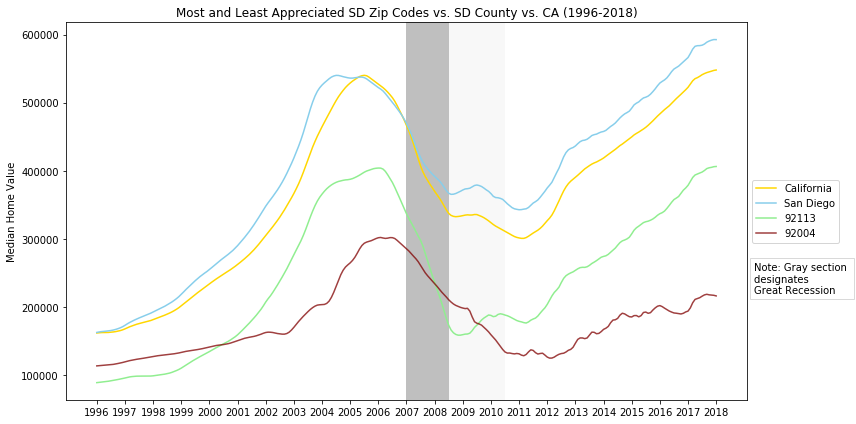

In [25]:
# Collect the months where data was collected
months = state_county_zip_22yr.keys()

# Set figure size
plt.figure(figsize=(12,6))
# plt.grid(b=True, which='major', axis='y', linewidth=.2)

# Plot highest and lowest zip appreciation rates compared to county and state -- monthly data as layered line graph
ca_line = plt.plot(months, ca_row_index_22yr_list, color="gold",label="California")

sd_line = plt.plot(months, sd_row_index_22yr_list, color="skyblue",label="San Diego")

top_line = plt.plot(months, zip_high_row_index_22yr_list, color="lightgreen",label=zip_high_row.iloc[0,0])

low_line = plt.plot(months, zip_low_row_index_22yr_list, color="maroon", alpha=.75, label=zip_low_row.iloc[0,0])

# Create a title and axis labels
plt.title("Most and Least Appreciated SD Zip Codes vs. SD County vs. CA (1996-2018)")
plt.ylabel("Median Home Value")

# Put gray section for recession time range (Dec 2007-June 2009)
plt.axvspan("2007-12", "2009-06", facecolor='gray', alpha=0.5)
plt.axvspan("2009-06", "2011-06", facecolor='gray', alpha=0.05)
plt.text(280, 220000, "Note: Gray section \ndesignates \nGreat Recession", bbox=dict(facecolor='none', edgecolor='black', alpha=.15))

# Create desired ticks (year)
tick_locations = ["1996-12", "1997-12", "1998-12", "1999-12", "2000-12", "2001-12", "2002-12", "2003-12", "2004-12", "2005-12", "2006-12", "2007-12", "2008-12", "2009-12", "2010-12", "2011-12", "2012-12", "2013-12", "2014-12", "2015-12", "2016-12", "2017-12", "2018-12"]
tick_names = ["1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
plt.xticks(tick_locations, tick_names)

# Create a legend for our chart
plt.legend(loc='center left', bbox_to_anchor=(1, .5))

# Tight Layout
plt.tight_layout()

# Output figure
plt.savefig('../Visualizations/Most and Least Appreciated SD Zip Codes vs. SD County vs. CA (1996-2018).png')

# Show figure
plt.show()